In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
sns.set()

In [3]:
data_train = pd.read_excel("E-Commerce_train.xlsx")
data_test = pd.read_excel("E-Commerce_test.xlsx")
data_train["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_train["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_train["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_train["Gender"].replace({"F":0, "M":1},inplace= True)
data_test["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_test["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_test["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_test["Gender"].replace({"F":0, "M":1},inplace= True)
data_test=data_test[["ID","Mode_of_Shipment","Customer_care_calls","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]]
X = data_train[["ID","Mode_of_Shipment","Customer_care_calls","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]]
y = data_train["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60, stratify=y)

In [12]:
#MODELO1
tree = DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5)
#MODELO2
knn = KNeighborsClassifier(algorithm='auto', leaf_size=7, n_neighbors=18, weights='uniform')
#MODELO3
svm = SVC()
estimator_list = [
    ('knn',knn),
    ('svm', svm),
    ('tree',tree)]

stack_model = StackingClassifier(
    estimator_list, final_estimator = LogisticRegression(class_weight={ 0:0.4, 1:0.6 })
)
stack_model.fit(X_train,y_train)
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
precision = precision_score(y_test, y_test_pred)
print('Precision sobre test',precision)
exactitud = accuracy_score(y_test, y_test_pred)
print('Accuracy sobre test',exactitud)
precision = recall_score(y_test, y_test_pred, average=None)
print('Recall sobre test',precision)
precision = f1_score(y_test, y_test_pred)
print('F1_Score ', precision)

Accuracy sobre conjunto de Train: 0.6937074593693568
Precision sobre test 0.670755326016785
Accuracy sobre test 0.6583333333333333
Recall sobre test [0.22256098 0.90821678]
F1_Score  0.7716301522465652


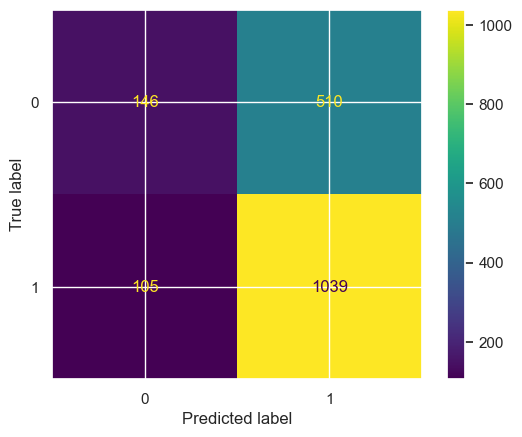

In [13]:
matrix = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

In [14]:
predict_test=stack_model.predict(data_test)

In [15]:
predict_test = pd.DataFrame(predict_test,columns=['pred'])
predict_test = predict_test.to_csv('joacota2.csv', index= False)